# Task : Indian Sign Language Recognition(gesture recognition) and Conversion to speech

## Objective:
Develop instructional materials for students to learn machine learning using
Jupyter Notebook and other ML tools. The aim is to accurately recognize
ISL(Indian Sign Language Recognition) gestures, convert them into
corresponding text, and then convert the text into speech.

## Tools and Technologies:
  * **Jupyter Notebook:** For data preprocessing, model development, and
training.

  * **Programming Language:** Python - Widely used for its simplicity,
extensive libraries, and ecosystem support.

## Starting the Exciting Journey for this project by following these

To make this interesting project we will be following some steps and sub-steps so that our project can be made without any errors. This is the most useful project which we are going to make, which deals with the real life problem of deaf and dumb people.

So let us start this exciting journey with the following steps:
* **Step1:** Making our system ready for this project, for that you need to download some libraries of python using `pip` command.
  * OpenCV ----> `pip install opencv-python` ----> open-source library for computer vision, machine learning, and image processing.
  * PIL ----> `pip install pillow` ----> Pillow provides the ImageDraw module that provides simple 2D graphics for Image objects.
  * tensorflow ----> `pip install tensorflow` ----> used to build and train deep learning models as it facilitates the creation of computational graphs and efficient execution on various hardware platforms
  * sklearn ----> `pip install scikit-learn` used here for spliting data into test and train.
  * pyttsx3 ----> `pip install pyttsx3` used to convert text to speech.

  Do not worry you are not supposed to copy these commends and install one by one in your terminal because you will see these commands installed at the time of there use in this notebook file only, so chill....
* **Step2:** Making Hardware ready for this project,for that we will be following some sub steps which are as followed:
  * Getting the Arduino code
  * Interfacing the Hardware
  * Installing the code to the Hardware
  * Getting the esp32_url for this project
* **Step3:** Now after sucessfully installing these libraries of python, you need to import these libraries for this project.
* **Step4:** Data collection and processing, this very steps have some sub steps which is needed to be followed:
  * **Data Collection:** Capture image form esp32-cam and save them with there class name(in our project it is A to Z gestures).
  * **Data storing:** Now after creating your data with there class name you need to store these data into csv file, in our case we are taking the image data of any pixel, resizing it to 40x40, spliting the data into test and train and after this we will be storing these data in to csv files named as `train.csv` and `test.csv`.
  * **Data Loading:** We will be loading these csv files in our code.
  * **Data Processing:** Now its time to process the data for this project which will be helpful for us to develop the model and test it for the accuracy.
  * **Debugging:** Debugging the data is most essential before model development as it debugs our process and alearts us when there is any error.
  * **Previewing Data:** After some more data processing now we will be previewing the data in grayscale as this gives us the correct image data for developing our model.
* **Step5:** Developing our ML model.
* **step6:** Deploying this ML model using esp32-cam, for this we will be following some sub steps which are as follows:
  * some necessary system commands
  * Import some libraries
  * Load ML model
  * Connect to esp32-cam
  * Prediction
  * Converting the predicted value to text
  * Converting the text to speech

and yes if you follow these steps, you will be getting your project ready.

## **Step 1:** Getting system ready

In [1]:
!pip install opencv-python

In [2]:
!pip install pillow

In [3]:
!pip install tensorflow

In [4]:
!pip install scikit-learn

In [5]:
!pip install pyttsx3

In [6]:
!pip install matplotlib

In [7]:
!pip install seaborn

## **Step 2:** Making Hardware ready


### Getting the code

Open Arduino IDE and follow these sub steps:

Go to `File---> Examples---> Esp32---> Camera---> CameraWebServer`

if you can not see the Esp32 in Examples then do not worry and follow this

Go to `Tools---> Board:---> Boards Manager...`
    
now find Esp32 in board manager and install it in your IDE by clicking the install button.

### Interfacing the Hardware

See the beloy diagram and interface the esp32-cam as ot is (Do not forget to connect GPIO0 pin to GND).

Now connect the FTDI to the computer through the usb cable
* 5V ---> VCC
* GND ---> GND
* U0T ---> Rx
* U0R ---> Tx
* IO0 ---> GND

pin diagram for your ease.

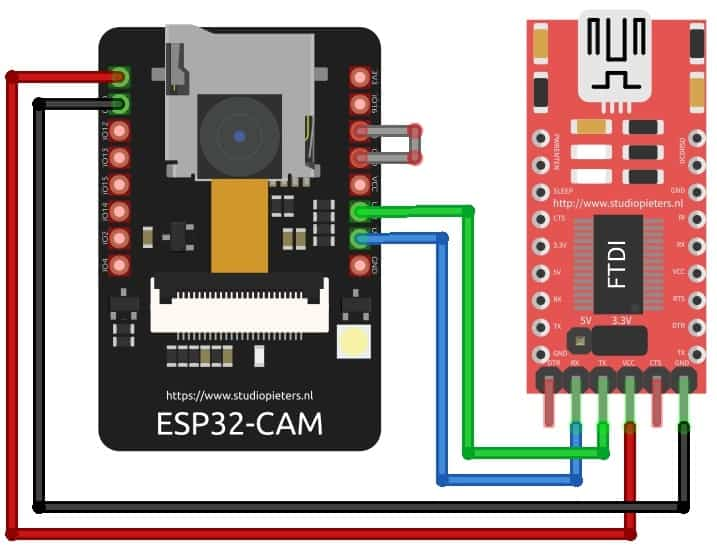

### Installing code to Hardware

Follow these steps to install code to your Hardware:
* **Step 1:** Open the example code and do some necessary changes so that it can be used in our project, which are as follows:
  * Comment the line no 17 which is `#define CAMERA_MODEL_ESP_EYE  // Has PSRAM`
  * uncomment the line no 25 which is `#define CAMERA_MODEL_AI_THINKER // Has PSRAM`
  * change the ssid and password
  ```
  const char *ssid = "**********";
  const char *password = "**********";
  ```

Now Install the code on esp32cam by selecting the correct board and port to which the esp32-cam is connected. To do so

Go to `Tools---> Board---> esp32---> AI Thinker ESP32-CAM`

Go to `Tools---> Port---> your port`

and hit the upload button (it will take some time to verify and upload the code to the esp32-cam).

if it shows any error the for debugging follow these steps:
* Press the reset button present on the esp32-cam module.
* Check the connection for any loose fitting.


### Getting esp32_url for this project

Your Hardware is ready with the code now, only you need to get your esp32_url to get the camera access for this project. To do so you need to follow some steps which are as follows:
* Open the serial monitor
* Set the baud rate to `115200 baud`
* Remove the jumper wire which is connected to IO0 to GND of esp32-cam module
* Press the reset button present on the esp32-cam module, you will notice some url is printed on the serial monitor.
* Copy this url and paste on the browser of your PC (ensure that your pc is also connected to the same hotspot to which the esp32-cam module is connected).
* Now serach for the start stream button red in colour.
* Click that button for starting the video stream, now video will start streaming on the web page
* Now right click on the video displayed and go to open in new tab and cose the previous tab
* Copy the url of the current page and thats it you got your esp32 url.

## **Step 3:** Necessary Imports


In [72]:
import cv2  # openCV library for image processing
import os  # for some system functions
import numpy as np   # for data processing
import pandas as pd  # for data manupulation
from PIL import Image  # for accessing the image to our code as data
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf  # for making deeplearning model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split # for spliting the data into test and train
from sklearn.metrics import classification_report,confusion_matrix
import time

### Connecting the drive to to notebook by running this code.

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Step 4:** Data Collection and Processing


### Data Collection


In [74]:
def capture_images_from_esp32(class_name, esp32_url, capture_duration=20, save_dir='data'):
    # Create the directory for the class if it doesn't exist
    class_dir = os.path.join(save_dir, class_name)
    os.makedirs(class_dir, exist_ok=True)

    # Start capturing images from ESP32-CAM
    cap = cv2.VideoCapture(esp32_url)
    if not cap.isOpened():
        print(f"Failed to open video stream at {esp32_url}")
        return

    start_time = time.time()
    img_count = 0

    while int(time.time() - start_time) < capture_duration:
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture image from ESP32-CAM")
            break

        # Save the frame as an image file
        img_path = os.path.join(class_dir, f"{img_count}.jpg")
        cv2.imwrite(img_path, frame)
        img_count += 1

        # Display the frame (optional)
        cv2.imshow('Capturing', frame)

        # Press 'q' to quit early
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the capture and close any OpenCV windows
    cap.release()
    cv2.destroyAllWindows()
    print(f"Captured {img_count} images for class '{class_name}'.")

In [75]:
esp32_url = 'http://192.168.144.123:81/stream'  # Replace with your ESP32-CAM stream URL

In [76]:
if __name__ == "__main__":
    print(f"Trying to open video stream at {esp32_url}")

    while True:
        class_name = input("Which class are you going to capture? (leave empty to exit) ")
        if not class_name:
            print("Exiting...")
            break

        print(f"Starting capture for class: {class_name}")
        capture_images_from_esp32(class_name, esp32_url)
        print(f"Finished capturing images for class: {class_name}")

Trying to open video stream at http://192.168.144.123:81/stream
Which class are you going to capture? (leave empty to exit) 
Exiting...


### Storing collected data into a csv file

In [77]:
# this code for store the collected data into a csv file
def image_to_csv(image_folder_path, train_csv_file_path, test_csv_file_path, test_size=0.2, random_state=42):
    rows = []
    labels = [folder for folder in os.listdir(image_folder_path) if os.path.isdir(os.path.join(image_folder_path, folder))]

    for label in labels:
        label_folder_path = os.path.join(image_folder_path, label)

        for image_name in os.listdir(label_folder_path):
            if image_name.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                image_path = os.path.join(label_folder_path, image_name)
                image = Image.open(image_path)
                image = image.convert('L')
                image = image.resize((40, 40))  # Resize images to 40x40
                image_array = np.array(image)
                image_flattened = image_array.flatten().tolist()
                row = [label] + image_flattened
                rows.append(row)

    df = pd.DataFrame(rows)
    column_names = ['label'] + ['pixel_' + str(i) for i in range(len(rows[0]) - 1)]
    df.columns = column_names
    train_df, test_df = train_test_split(df, test_size=test_size, random_state=random_state, stratify=df['label'])
    train_df.to_csv(train_csv_file_path, index=False)
    test_df.to_csv(test_csv_file_path, index=False)

In [78]:
image_folder_path = '/content/drive/MyDrive/Last_Task/dataset'  # change according to your file address

In [79]:
train_csv_file_path = 'train.csv'
test_csv_file_path = 'test.csv'
image_to_csv(image_folder_path, train_csv_file_path, test_csv_file_path)

### Data Loading


Now reading our created csv file from the drive, replace this with your address of csv file.

In [141]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
# you should change these file path according to your file path

In [142]:
# you should change these file path according to your file path
test = pd.read_csv("test.csv")
y = test['label']

In [143]:
train_df.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_1590,pixel_1591,pixel_1592,pixel_1593,pixel_1594,pixel_1595,pixel_1596,pixel_1597,pixel_1598,pixel_1599
0,d,120,128,136,143,151,162,171,164,162,...,142,73,23,24,23,23,20,18,19,29
1,c,97,103,106,108,109,131,159,165,160,...,26,22,20,20,43,103,82,37,35,34
2,d,121,129,136,145,151,154,154,166,172,...,48,21,24,24,23,20,20,29,39,40
3,d,113,122,130,139,148,161,173,172,162,...,142,138,136,133,102,30,19,19,18,17
4,d,109,119,126,135,146,162,174,173,164,...,144,140,136,132,108,39,19,18,18,17


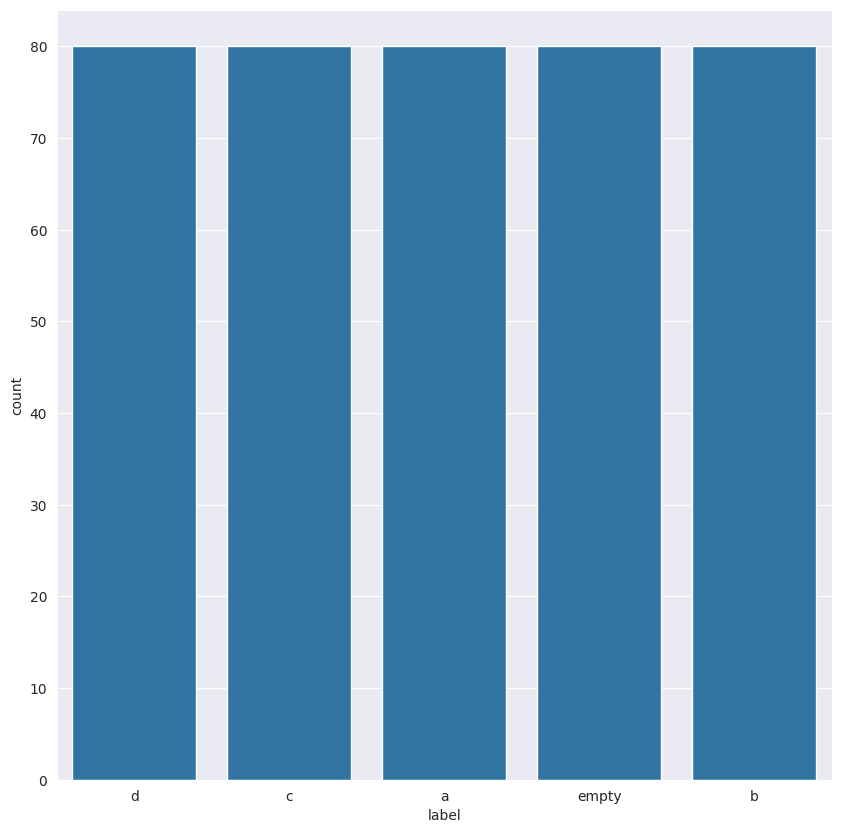

In [144]:
# Create the count plot
plt.figure(figsize=(10, 10))
sns.set_style("darkgrid")
sns.countplot(data=train_df, x='label')  # Use data= to specify the DataFrame
plt.show()

### Data Processing

Function which converts the labels into a integer like:


*   a ---> 1
*   b ---> 2
*   c ---> 3

and so on...



In [145]:
def change_label(row):
    label_mapping = {
        'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8,
        'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16,
        'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24,
        'y': 25, 'z': 26, 'empty': 0
    }
    return label_mapping.get(row['label'], 0)

Now we have to apply the functions previously made to convert the labels from string to an integer value which will be helpful for our model development.

In [146]:
# Apply the function to each row of the DataFrame
train_df['label'] = train_df.apply(change_label, axis=1)
test_df['label'] = test_df.apply(change_label, axis=1)

Now defining y_train and y_test for developing our model as labels

In [147]:
y_train = train_df['label']
y_test = test_df['label']
y_debug = y_train[0:10]
del train_df['label']
del test_df['label']

In [148]:
print(y_train) # Prints the y_train all labels

0      4
1      3
2      4
3      4
4      4
      ..
395    4
396    0
397    4
398    2
399    1
Name: label, Length: 400, dtype: int64


In [89]:
train_df.shape # prints the shape of the train_df

(400, 1600)

The code snippet provided utilizes the LabelBinarizer class from the sklearn.preprocessing module in the scikit-learn library. This class is used to convert categorical labels into a binary (one-hot encoded) format

In [90]:
from sklearn.preprocessing import LabelBinarizer # Import the LabelBinarizer

In [91]:
label_binarizer = LabelBinarizer() # Create an instance of LabelBinarizer

In [92]:
# Fit on the training data and transform both train and test data
y_train = label_binarizer.fit_transform(y_train) # Fit the LabelBinarizer on the y_train data and transform it
y_test = label_binarizer.fit_transform(y_test) # Fit the LabelBinarizer on the y_test data and transform it

Now defining the x_train and x_test for development of our model.

In [93]:
x_train = train_df.values
x_test = test_df.values

In [94]:
# Convert y_train and y_test to numpy arrays if they are pandas Series
if isinstance(y_train, pd.Series):
    y_train = y_train.to_numpy()
if isinstance(y_test, pd.Series):
    y_test = y_test.to_numpy()

In [95]:
# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)

In [96]:
# Reshape y_train and y_test for encoding
y_train_flat = y_train.reshape(-1, 1)
y_test_flat = y_test.reshape(-1, 1)

y_train_encoded = encoder.fit_transform(y_train_flat)
y_test_encoded = encoder.transform(y_test_flat)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [97]:
# Reshape x_train and x_test to 4D tensors if they are not already
if len(x_train.shape) == 2:  # If the shape is (num_samples, height*width)
    x_train = x_train.reshape(x_train.shape[0], 40, 40, 1)
if len(x_test.shape) == 2:  # If the shape is (num_samples, height*width)
    x_test = x_test.reshape(x_test.shape[0], 40, 40, 1)

In [98]:
# This code will print the shape of all the data for developing the model
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)

Shape of y_train_encoded: (2000, 2)
Shape of y_test_encoded: (500, 2)
Shape of x_train: (400, 40, 40, 1)
Shape of x_test: (100, 40, 40, 1)


In [99]:
# Reshaping the array if not in desired shape
print("Shape of x_train:", x_train.shape)
try:
    reshaped_array = x_train.reshape(-1, 40, 40, 1)
    print("Shape of the reshaped array:", reshaped_array.shape)
except ValueError as e:
    print("Error:", e)

Shape of x_train: (400, 40, 40, 1)
Shape of the reshaped array: (400, 40, 40, 1)


### Debugging the data before model development.

In [100]:
x_tmp = x_train[0]
x_tmp=x_tmp.reshape(1,40,40,1)
x_tmp = np.array(x_tmp)
x_tmp.shape

(1, 40, 40, 1)

In [101]:
np.transpose(y_debug).shape

(10,)

In [102]:
# I will use this for debuggin on the ESP32
x_debug = (train_df.values)[0:10]
csv_x_debug = 'csv_x.csv'
csv_y_debug = 'csv_y.csv'
y_db2 = np.array(y_debug).reshape(1,-1)
# Write data to the CSV file
np.savetxt(csv_x_debug, x_debug, delimiter=',', fmt='%s')
np.savetxt(csv_y_debug, y_db2, delimiter=',', fmt='%s')

### Some more data processing before model development

In [103]:
# Normalize the data while preserving the data type
x_train = (x_train.astype(np.float32)  / 127.5) - 1.0
x_test = (x_test.astype(np.float32) / 127.5) - 1.0

In [104]:
print(x_train.shape)
print(x_train.size)

(400, 40, 40, 1)
640000


In [105]:
print(x_test.shape)
print(x_test.size)

(100, 40, 40, 1)
160000


In [106]:
x_train = x_train.reshape(-1, 40, 40, 1)
x_test = x_test.reshape(-1, 40, 40, 1)

In [107]:
x_train.shape

(400, 40, 40, 1)

### Preview of our data

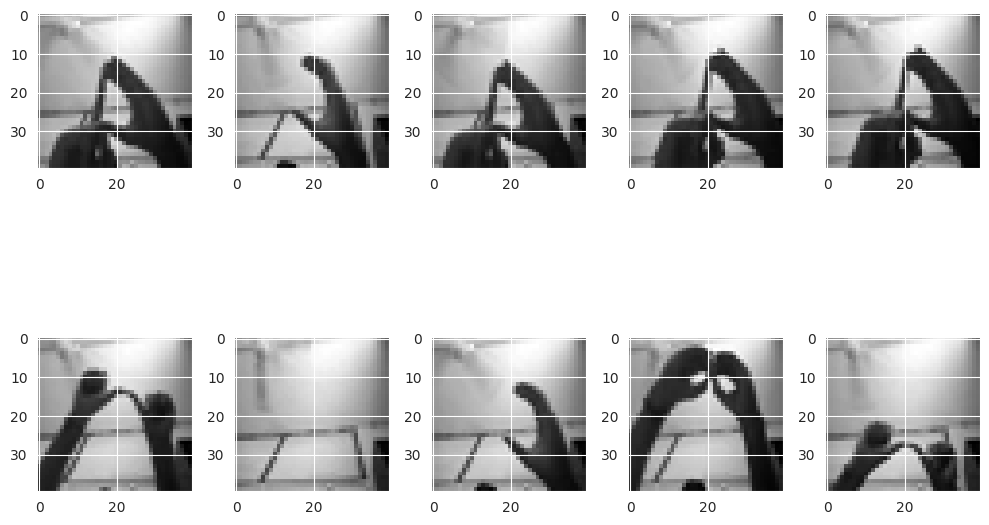

In [108]:
f, ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        # Ensure the image data is reshaped and of the correct data type
        ax[i,j].imshow(x_train[k].reshape(40, 40).astype(np.float32) , cmap = "gray")
        k += 1
    plt.tight_layout()

In [109]:
x_train.shape

(400, 40, 40, 1)

In [110]:
y_train.shape

(400, 5)

## **Step 5:** Model Development

### Model Development

In [111]:
# Define your model
model = Sequential([
    Conv2D(65, kernel_size=(3, 3), activation='relu', input_shape=(40, 40, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(40, kernel_size=(3, 3), activation='relu'),
    Dropout(0.25),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(25, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # for 5 classes
])

In [112]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [113]:
# Print model summary
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 38, 38, 65)        650       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 19, 19, 65)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 17, 17, 40)        23440     
                                                                 
 dropout_4 (Dropout)         (None, 17, 17, 40)        0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 40)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 6, 6, 25)         

In [114]:
y_train.shape

(400, 5)

In [115]:
# Initialize ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

### Training The Model

This will slightly reduce the learning_rate_while developing the ML model for increasing the accuracy.

In [116]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [117]:
# Now fitting the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
                    steps_per_epoch=len(x_train) / 128,
                    epochs=20,
                    validation_data=(x_test, y_test),
                    callbacks=[learning_rate_reduction])

Epoch 1/20
3/3 [==============================] - 3s 188ms/step - loss: 1.5625 - accuracy: 0.3000 - val_loss: 1.4657 - val_accuracy: 0.3800 - lr: 0.0010
Epoch 2/20
3/3 [==============================] - 0s 102ms/step - loss: 1.3949 - accuracy: 0.3925 - val_loss: 1.2365 - val_accuracy: 0.3800 - lr: 0.0010
Epoch 3/20
3/3 [==============================] - 0s 93ms/step - loss: 1.1226 - accuracy: 0.5600 - val_loss: 0.9401 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 4/20
3/3 [==============================] - 0s 82ms/step - loss: 0.9229 - accuracy: 0.6600 - val_loss: 0.6642 - val_accuracy: 0.9300 - lr: 0.0010
Epoch 5/20
3/3 [==============================] - 0s 105ms/step - loss: 0.6948 - accuracy: 0.7600 - val_loss: 0.4280 - val_accuracy: 0.9600 - lr: 0.0010
Epoch 6/20
3/3 [==============================] - 0s 78ms/step - loss: 0.4649 - accuracy: 0.8725 - val_loss: 0.2543 - val_accuracy: 0.9800 - lr: 0.0010
Epoch 7/20
3/3 [==============================] - 0s 126ms/step - loss: 0.3647 - accu

### Model evaluation

In [118]:
# Evaluate the model
accuracy = model.evaluate(x_test, y_test)[1]
print("Accuracy of the model is - {:.2f}%".format(accuracy * 100))

4/4 [==============================] - 0s 5ms/step - loss: 0.0619 - accuracy: 0.9800
Accuracy of the model is - 98.00%


This will generate a Training & Validation Accuracy and a Testing Accuracy & Loss graph for visualising the accuracy as per epochs to check for over fitting.

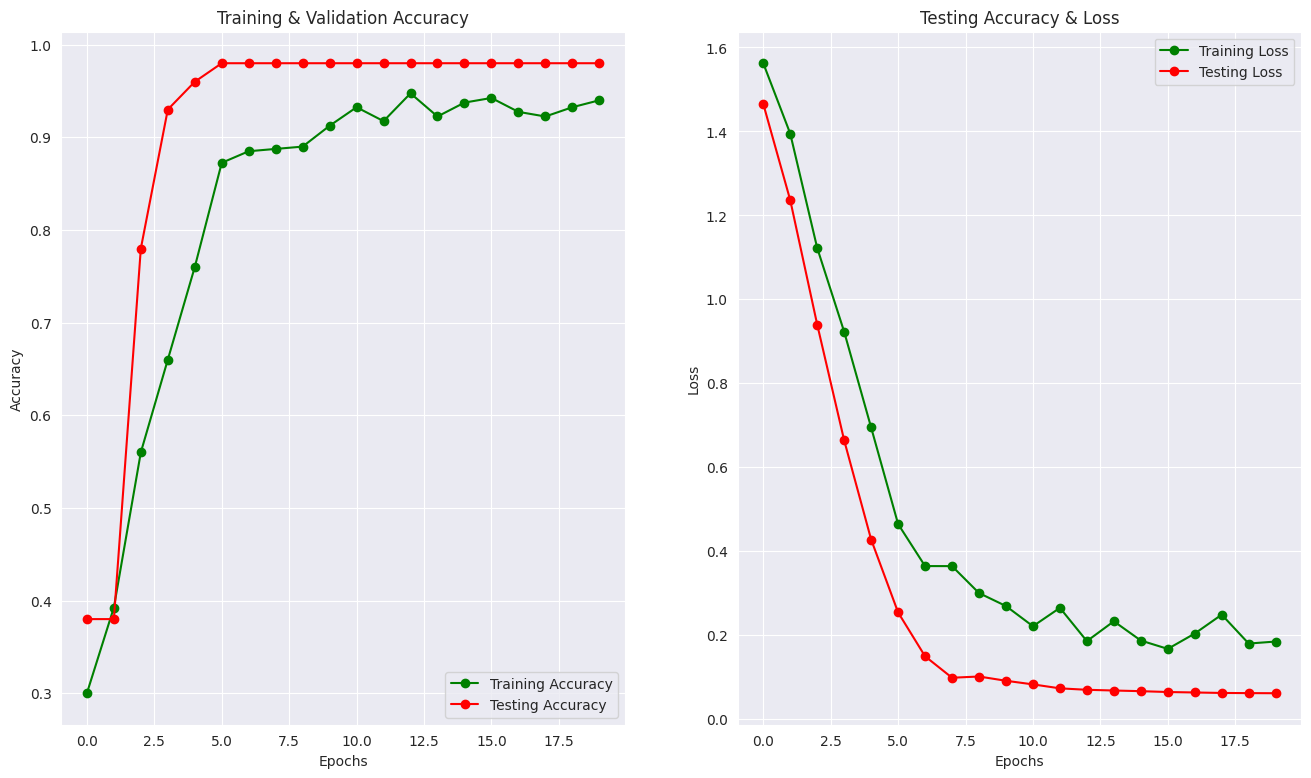

In [119]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [120]:
# Predicting the first five test data
preds = model.predict(x_test)
predictions = np.argmax(preds, axis=1)
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1
predictions[:5]

4/4 [==============================] - 0s 3ms/step


array([3, 4, 3, 1, 1])

Now model is saved for our further use

In [121]:
# Save the model
model.save('sign_language_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **Step 6:** Deployment


### System commands

In [122]:
!sudo apt-get install espeak

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  espeak-data libespeak1 libportaudio2 libsonic0
The following NEW packages will be installed:
  espeak espeak-data libespeak1 libportaudio2 libsonic0
0 upgraded, 5 newly installed, 0 to remove and 45 not upgraded.
Need to get 1,382 kB of archives.
After this operation, 3,178 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libsonic0 amd64 0.2.0-11build1 [10.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 espeak-data amd64 1.48.15+dfsg-3 [1,085 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libespeak1 amd64 1.48.15+dfsg-3 [156 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 espeak amd64 1.48.15+dfsg-3 [64.2 kB]
Fetched 1,382 kB in 0s (3,998 

In [123]:
!ls /usr/lib | grep libespeak

In [124]:
!sudo apt-get install alsa-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libatopology2 libfftw3-single3
Suggested packages:
  dialog libfftw3-bin libfftw3-dev
The following NEW packages will be installed:
  alsa-utils libatopology2 libfftw3-single3
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 2,028 kB of archives.
After this operation, 5,142 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libatopology2 amd64 1.2.6.1-1ubuntu1 [51.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfftw3-single3 amd64 3.3.8-2ubuntu8 [800 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 alsa-utils amd64 1.2.6-1ubuntu1 [1,177 kB]
Fetched 2,028 kB in 0s (7,936 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/per

In [125]:
!pip install opencv-python tensorflow pyttsx

  Preparing metadata (setup.py) ... done
  Created wheel for pyttsx: filename=pyttsx-1.1-py3-none-any.whl size=22441 sha256=6d0a253c69749e12ca78683f9958f17a4697361e445b65bec2537d8efe346f49
  Stored in directory: /root/.cache/pip/wheels/5f/1b/16/30b2d882bd9e7c4d452c657e2127b3d7bad3a6093dae9118c7
Successfully built pyttsx


In [126]:
!pip install opencv-python-headless

### Deployment of the ml model using esp32 cam


In [127]:
import cv2
import numpy as np
import tensorflow as tf
import pyttsx3 as ps
import threading

In [128]:
# Initialize the pyttsx3 engine once to avoid multiple instances
engine = ps.init()

In [129]:
def speak(text):
    def speak_thread(text):
        # Ensure the global engine is used
        engine.say(text)
        engine.runAndWait()
    thread = threading.Thread(target=speak_thread, args=(text,))
    thread.start()

In [130]:
# Load the TensorFlow model
model = tf.keras.models.load_model("sign_language_model.h5") # you should change these file path according to your file path

Run this if you want to use pc web cam for this project.

In [ ]:
# Define the video capture object
vc = cv2.VideoCapture(0)

Run this if you want to use esp32 cam as a camera for this project.

In [ ]:
# Replace with your ESP32-CAM stream URL
stream_url = 'http://192.168.92.123:81/stream'

In [ ]:
# Open a connection to the IP camera using OpenCV VideoCapture
vc = cv2.VideoCapture(stream_url)

In [ ]:
# Check if the webcam opened successfully
if not vc.isOpened():
    print("Error: Could not open webcam.")
    exit()

In [ ]:
# Map the predicted class to the corresponding gesture
gestures = {
        0: 'empty', 1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E',
        6: 'F', 7: 'G', 8: 'H', 9: 'I', 10: 'J', 11: 'K',
        12: 'L', 13: 'M', 14: 'N', 15: 'O', 16: 'P', 17: 'Q',
        18: 'R', 19: 'S', 20: 'T', 21: 'U', 22: 'V', 23: 'W',
        24: 'X', 25: 'Y', 26: 'Z'
}

In [ ]:
# Loop until the user presses the 'q' key
while True:
    # Capture a frame from the webcam
    ret, frame = vc.read()
    if not ret:
        print("Failed to capture image")
        break

    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Resize the frame to 40x40
    resized_frame = cv2.resize(gray_frame, (40, 40))

    # Normalize the pixel values
    normalized_frame = resized_frame / 127.5 - 1.0

    # Add a batch dimension and ensure it has the right shape
    input_data = np.expand_dims(normalized_frame, axis=(0, -1)).astype(np.float32)

    # Perform inference using the model
    output_data = model.predict(input_data)

    # Get the predicted class
    predicted_class = np.argmax(output_data)

    predicted_gesture = gestures.get(predicted_class, 'unknown')

    # Print the predicted class
    print("Predicted gesture:", predicted_gesture)
    if predicted_gesture != 'empty':
        speak(predicted_gesture)

    # Display the frame
    cv2.imshow('Webcam_Gesture_Recognition', gray_frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object
vc.release()

# Close all windows
cv2.destroyAllWindows()


## Author

### Developed by Harsh Raj
Contacts :
- [Email](mailto:developerharshraj@gmail.com)
- [LinkedIn](https://in.linkedin.com/in/harsh-raj-416a0b27b)
- [GitHub](https://github.com/HarshRajTiwary)

### Happy Learning